In [1]:
!pip install opendatasets

# Load

In [2]:
pip install kaggle

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/MyDrive/Modul 3 kel"

In [5]:
%cd /content/drive/MyDrive/Modul 3 kel

/content/drive/MyDrive/Modul 3 kel


In [6]:
!kaggle datasets download -d vijaykumar1799/face-mask-detection

 95% 211M/222M [00:02<00:00, 65.1MB/s]
100% 222M/222M [00:02<00:00, 78.5MB/s]


In [7]:
ls

face-mask-detection.zip  kaggle.json


In [8]:
!unzip \*.zip &> /dev/null && rm *.zip

# Load and Split Data

In [9]:
import os
base_dataset = '/content/drive/MyDrive/Modul 3 kel/Dataset'
class_dir = ['mask_weared_incorrect', 'with_mask', 'without_mask' ]
for class_item in class_dir:
  cur_dir = base_dataset+"/"+class_item
  
  dataset = os.listdir(cur_dir)
  for item in dataset:
    if not item.endswith(".png"):
        os.remove(os.path.join(cur_dir,item))

In [ ]:
cd /content/drive/MyDrive/Modul 3 kel/Dataset

/content/drive/MyDrive/Modul 3 kel/Dataset


In [10]:
ls


Dataset/  kaggle.json


In [11]:
!pip install split-folders
#Split Menjadi 80, 19, 1 %
import splitfolders
splitfolders.ratio('/content/drive/MyDrive/Modul 3 kel/Dataset',
                   output="/content/drive/MyDrive/Modul 3 kel/Fix-Dataset2",
                   seed=42, ratio=(.8 ,0.19 ,0.01), group_prefix=None)


Copying files: 8982 files [02:44, 54.73 files/s]


In [12]:
dataset_awal ='/content/drive/MyDrive/Modul 3 kel/Dataset'
#tot_data_noclean = paper+rock+scissors

print('Number of classes: {}'.format(len(os.listdir(dataset_awal))))
#print('Number of datas: {}'.format(tot_data_noclean))
print('')

mask_weared_incorrect = len(os.listdir(dataset_awal+'/mask_weared_incorrect'))
with_mask = len(os.listdir(dataset_awal+'/with_mask'))
without_mask = len(os.listdir(dataset_awal+'/without_mask'))

print("DATASET AWAL ")
print('mask_weared_incorrect : ', mask_weared_incorrect)
print('with_mask : ', with_mask)
print('without_mask : ', without_mask)




Number of classes: 3

DATASET AWAL 
mask_weared_incorrect :  2994
with_mask :  2994
without_mask :  2994


In [13]:
#Define a path
base_dir = '/content/drive/MyDrive/Modul 3 kel/Fix-Dataset2'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')

train_mask_weared_incorrect_dir = os.path.join(train_dir, 'mask_weared_incorrect')
train_with_mask_dir = os.path.join(train_dir, 'with_mask')
train_without_mask_dir = os.path.join(train_dir, 'without_mask')

validation_mask_weared_incorrect_dir = os.path.join(validation_dir, 'mask_weared_incorrect')
validation_with_mask_dir = os.path.join(validation_dir, 'with_mask')
validation_without_mask_dir = os.path.join(validation_dir, 'without_mask')

test_mask_weared_incorrect_dir = os.path.join(test_dir, 'mask_weared_incorrect')
test_with_mask_dir = os.path.join(test_dir, 'with_mask')
test_without_mask_dir = os.path.join(test_dir, 'without_mask')

In [14]:
print('Train : ')
print('Train mask_weared_incorrect :', len(os.listdir(train_mask_weared_incorrect_dir)))
print('Train with_mask : ', len(os.listdir(train_with_mask_dir)))
print('Train without_mask : ', len(os.listdir(train_without_mask_dir)))
print(""*2)
print('Validation : ')
print('Validation mask_weared_incorrect :', len(os.listdir(validation_mask_weared_incorrect_dir)))
print('Validationn with_mask : ', len(os.listdir(validation_with_mask_dir)))
print('Validation without_mask : ', len(os.listdir(validation_without_mask_dir)))
print(""*2)
print('Test : ')
print('Test mask_weared_incorrect :', len(os.listdir(test_mask_weared_incorrect_dir)))
print('Test with_mask : ', len(os.listdir(test_with_mask_dir)))
print('Test without_mask : ', len(os.listdir(test_without_mask_dir)))

Train : 
Train mask_weared_incorrect : 2395
Train with_mask :  2395
Train without_mask :  2395

Validation : 
Validation mask_weared_incorrect : 568
Validationn with_mask :  568
Validation without_mask :  568

Test : 
Test mask_weared_incorrect : 31
Test with_mask :  31
Test without_mask :  31


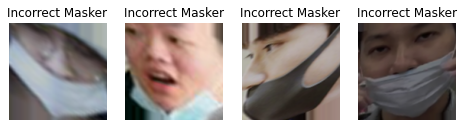

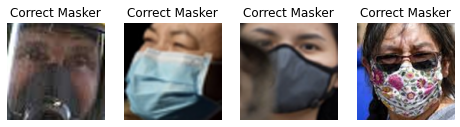

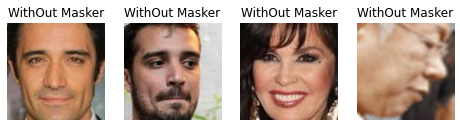

In [15]:
#1.3 Gambar
# Tampilkan 8 image per kelas dengan ukuran 2x4

%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mping

mask_wear_incorr = os.listdir(train_mask_weared_incorrect_dir)
with_mask = os.listdir(train_with_mask_dir)
without_mask = os.listdir(train_without_mask_dir)

fname1 = [os.path.join(train_mask_weared_incorrect_dir, fname)
        for fname in mask_wear_incorr[:4]]
fname2 = [os.path.join(train_with_mask_dir, fname)
        for fname in with_mask[:4]]
fname3 = [os.path.join(train_without_mask_dir, fname)
        for fname in without_mask[:4]]


nrows = 2
ncols = 4
#Incorrect Masker
fig = plt.gcf()
fig.set_size_inches( ncols * 2,nrows * 2)
for i,fname in enumerate(fname1):
  sp = plt.subplot(2,4,i+1)
  sp.axis('off')
  img = mping.imread(fname)
  plt.title('Incorrect Masker')
  plt.imshow(img)
plt.show()

#WithMask
nrows = 2
ncols = 4
fig = plt.gcf()
fig.set_size_inches(ncols * 2,nrows * 2)
for i,fname in enumerate(fname2):
    sp = plt.subplot(2,4,i+1)
    sp.axis('off')
    img = mping.imread(fname)
    plt.title('Correct Masker')
    plt.imshow(img)
    
plt.show()

#WithMask
nrows = 2
ncols = 4
fig = plt.gcf()
fig.set_size_inches(ncols * 2,nrows * 2)
for i,fname in enumerate(fname3):
    sp = plt.subplot(2,4,i+1)
    sp.axis('off')
    img = mping.imread(fname)
    plt.title('WithOut Masker')
    plt.imshow(img)
    
plt.show()

# Preprocessing

In [16]:
%cd /content/drive/MyDrive/Modul 3 kel

/content/drive/MyDrive/Modul 3 kel


In [17]:
height = 100
width = 100
batch_size = 32

In [18]:
!pip3 install keras

In [19]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

In [20]:
generator_datagen = ImageDataGenerator(
    rescale = 1./255,
    #rotation_range=40,
    #width_shift_range=0.2,
    #height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

val_gen = ImageDataGenerator(rescale = 1./255)

TRAINING_DIR = "/content/drive/MyDrive/Modul 3 kel/Fix-Dataset2/train"
VALIDATION_DIR = "/content/drive/MyDrive/Modul 3 kel/Fix-Dataset2/val"
TEST_DIR = "/content/drive/MyDrive/Modul 3 kel/Fix-Dataset2/test"

train_generator = generator_datagen.flow_from_directory(
    TRAINING_DIR,
    target_size=(height, width),
    class_mode='categorical',
    color_mode="rgb",
    shuffle=True,
    batch_size=batch_size
)

validation_generator = val_gen.flow_from_directory(
    VALIDATION_DIR,
    target_size=(height,width),
    class_mode='categorical',
    color_mode="rgb",
    shuffle=False,
    batch_size=batch_size
)

test_generator = val_gen.flow_from_directory(
    TEST_DIR,
    target_size=(height,width),
    class_mode='categorical',
    color_mode="rgb",
    shuffle=False,
    batch_size=batch_size
)

Found 7185 images belonging to 3 classes.
Found 1704 images belonging to 3 classes.
Found 93 images belonging to 3 classes.


# Modelling

In [21]:
# IMPORT SEMUA PAKET YANG ANDA PERLUKAN UNTUK MENDEFINISIKAN MODEL DISINI
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Conv2D, MaxPool2D, Flatten, BatchNormalization, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.optimizers import Adam
import time

In [22]:
# Model Husein
model = Sequential()

model.add(InputLayer(input_shape=[100,100,3]))

model.add(Conv2D(filters=16, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=2, padding='same'))

model.add(Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=2, padding='same'))

model.add(Conv2D(filters=64, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=2, padding='same'))

model.add(Conv2D(filters=128, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=2, padding='same'))

model.add(Conv2D(filters=256, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=2, padding='same'))

model.add(Dropout(0.25))
model.add(Flatten())

# Fully Connected Layer
model.add(Dense(128, activation='relu'))
model.add(Dense(3, activation='softmax'))

# TULIS CODE UNTUK MENAMPILKAN SUMMARY DARI ARSITEKTUR MODEL ANDA DISINI
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 100, 100, 16)      448       
_________________________________________________________________
batch_normalization (BatchNo (None, 100, 100, 16)      64        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 50, 50, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 50, 50, 32)        4640      
_________________________________________________________________
batch_normalization_1 (Batch (None, 50, 50, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 25, 25, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 25, 25, 64)        1

In [23]:
#Model Adhi
model2 = Sequential()

model2.add(InputLayer(input_shape=[100,100,3]))
model2.add(Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu'))
model2.add(MaxPool2D(pool_size=2, padding='same'))
model2.add(Conv2D(filters=64, kernel_size=3, strides=1, padding='same', activation='relu'))
model2.add(MaxPool2D(pool_size=2, padding='same'))
model2.add(Conv2D(filters=128, kernel_size=3, strides=1, padding='same', activation='relu'))
model2.add(MaxPool2D(pool_size=2, padding='same'))
model2.add(Dropout(0.25))
model2.add(BatchNormalization())
model2.add(Flatten())

# Fully Connected Layer
model2.add(Dense(512, activation='relu'))
model2.add(Dropout(0.3))
model2.add(Dense(3, activation='softmax'))

# TULIS CODE UNTUK MENAMPILKAN SUMMARY DARI ARSITEKTUR MODEL ANDA DISINI
print(model2.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 100, 100, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 50, 50, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 50, 50, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 25, 25, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 25, 25, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 13, 13, 128)       0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 13, 13, 128)      

In [41]:
#Model Adhi
model3 = Sequential()

model3.add(InputLayer(input_shape=[100,100,3]))
model3.add(Conv2D(filters=64, kernel_size=3, strides=1, padding='same', activation='relu'))
model3.add(MaxPool2D(pool_size=2, padding='same'))
model3.add(Conv2D(filters=128, kernel_size=3, strides=1, padding='same', activation='relu'))
model3.add(MaxPool2D(pool_size=2, padding='same'))
model3.add(Conv2D(filters=256, kernel_size=3, strides=1, padding='same', activation='relu'))
model3.add(MaxPool2D(pool_size=2, padding='same'))
model3.add(Dropout(0.25))
model3.add(BatchNormalization())
model3.add(Flatten())

# Fully Connected Layer
model3.add(Dense(512, activation='relu'))
model3.add(Dropout(0.3))
model3.add(Dense(3, activation='softmax'))

# TULIS CODE UNTUK MENAMPILKAN SUMMARY DARI ARSITEKTUR MODEL ANDA DISINI
print(model3.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 100, 100, 64)      1792      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 50, 50, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 50, 50, 128)       73856     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 25, 25, 128)       0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 25, 25, 256)       295168    
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 13, 13, 256)       0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 13, 13, 256)      

In [24]:
#Compile Model 1
model.compile(loss='categorical_crossentropy',
             optimizer=Adam(lr=0.001),
             metrics='acc')

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [25]:
#Compile Model 2
model2.compile(loss='categorical_crossentropy',
             optimizer=Adam(lr=0.00146),
             metrics='acc')

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [44]:
#Compile Model 2
model3.compile(loss='categorical_crossentropy',
             optimizer=Adam(lr=0.0015),
             metrics='acc')

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [26]:
H = model.fit(train_generator, steps_per_epoch=10, epochs=100, validation_data = validation_generator)

Epoch 1/100
10/10 [==============================] - 38s 747ms/step - loss: 1.4647 - acc: 0.7563 - val_loss: 0.9883 - val_acc: 0.5393
Epoch 2/100
10/10 [==============================] - 7s 711ms/step - loss: 0.8655 - acc: 0.7875 - val_loss: 1.0074 - val_acc: 0.4214
Epoch 3/100
10/10 [==============================] - 7s 702ms/step - loss: 0.5318 - acc: 0.8500 - val_loss: 1.3627 - val_acc: 0.3263
Epoch 4/100
10/10 [==============================] - 7s 708ms/step - loss: 0.4834 - acc: 0.8438 - val_loss: 1.9470 - val_acc: 0.3357
Epoch 5/100
10/10 [==============================] - 6s 691ms/step - loss: 0.3495 - acc: 0.8656 - val_loss: 2.7530 - val_acc: 0.3333
Epoch 6/100
10/10 [==============================] - 7s 706ms/step - loss: 0.3184 - acc: 0.8656 - val_loss: 3.3110 - val_acc: 0.3333
Epoch 7/100
10/10 [==============================] - 6s 699ms/step - loss: 0.2241 - acc: 0.9125 - val_loss: 3.1585 - val_acc: 0.3333
Epoch 8/100
10/10 [==============================] - 7s 702ms/step -

In [27]:
H2 = model2.fit(train_generator, steps_per_epoch=4, epochs=100, validation_data = validation_generator)

Epoch 1/100
4/4 [==============================] - 7s 2s/step - loss: 5.4120 - acc: 0.4922 - val_loss: 1.4622 - val_acc: 0.5974
Epoch 2/100
4/4 [==============================] - 5s 2s/step - loss: 1.1916 - acc: 0.7422 - val_loss: 1.5208 - val_acc: 0.5035
Epoch 3/100
4/4 [==============================] - 6s 2s/step - loss: 0.9852 - acc: 0.7266 - val_loss: 0.8541 - val_acc: 0.7465
Epoch 4/100
4/4 [==============================] - 5s 2s/step - loss: 0.7107 - acc: 0.7578 - val_loss: 0.9801 - val_acc: 0.3369
Epoch 5/100
4/4 [==============================] - 5s 2s/step - loss: 0.5300 - acc: 0.7812 - val_loss: 0.9390 - val_acc: 0.3996
Epoch 6/100
4/4 [==============================] - 5s 2s/step - loss: 0.5199 - acc: 0.8516 - val_loss: 0.8891 - val_acc: 0.4619
Epoch 7/100
4/4 [==============================] - 5s 2s/step - loss: 0.5941 - acc: 0.8438 - val_loss: 1.1005 - val_acc: 0.3333
Epoch 8/100
4/4 [==============================] - 5s 2s/step - loss: 0.5109 - acc: 0.7656 - val_loss: 0

In [45]:
H3 = model3.fit(train_generator, steps_per_epoch=10, epochs=100, validation_data = validation_generator)

Epoch 1/100
10/10 [==============================] - 9s 779ms/step - loss: 4.2714 - acc: 0.6000 - val_loss: 1.1697 - val_acc: 0.3339
Epoch 2/100
10/10 [==============================] - 7s 698ms/step - loss: 0.7231 - acc: 0.7500 - val_loss: 1.6666 - val_acc: 0.3333
Epoch 3/100
10/10 [==============================] - 7s 709ms/step - loss: 0.4511 - acc: 0.8344 - val_loss: 1.3712 - val_acc: 0.3333
Epoch 4/100
10/10 [==============================] - 7s 710ms/step - loss: 0.3959 - acc: 0.8219 - val_loss: 1.2624 - val_acc: 0.3333
Epoch 5/100
10/10 [==============================] - 7s 797ms/step - loss: 0.3732 - acc: 0.8375 - val_loss: 1.2106 - val_acc: 0.3333
Epoch 6/100
10/10 [==============================] - 7s 707ms/step - loss: 0.4037 - acc: 0.8406 - val_loss: 0.8570 - val_acc: 0.6068
Epoch 7/100
10/10 [==============================] - 7s 723ms/step - loss: 0.4296 - acc: 0.8594 - val_loss: 1.0344 - val_acc: 0.4278
Epoch 8/100
10/10 [==============================] - 8s 840ms/step - 

# Result

In [28]:
#Saved Model Husein
model.save('/content/drive/MyDrive/Modul 3 kel/saved_model/model.h5')


In [46]:
#Saved Model Adhi
model2.save('/content/drive/MyDrive/Modul 3 kel/saved_model/model1.h5')

In [47]:
#Saved Model Adhi
model3.save('/content/drive/MyDrive/Modul 3 kel/saved_model/model2.h5')

In [30]:
!pip3 install numpy
import numpy as np

In [31]:
#Get the accuracy score
test_score = model.evaluate_generator(test_generator, batch_size)

print("[INFO] accuracy: {:.2f}%".format(test_score[1] * 100)) 

print("[INFO] Loss: ",test_score[0])

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2006: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


[INFO] accuracy: 98.92%
[INFO] Loss:  0.04553293436765671


In [32]:
test_score2 = model2.evaluate_generator(test_generator, batch_size)

print("[INFO] accuracy: {:.2f}%".format(test_score2[1] * 100)) 

print("[INFO] Loss: ",test_score2[0])

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2006: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


[INFO] accuracy: 90.32%
[INFO] Loss:  0.2267211526632309


In [48]:
test_score3 = model3.evaluate_generator(test_generator, batch_size)

print("[INFO] accuracy: {:.2f}%".format(test_score3[1] * 100)) 

print("[INFO] Loss: ",test_score3[0])

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2006: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


[INFO] accuracy: 93.55%
[INFO] Loss:  0.1856558620929718


## Result Plotting

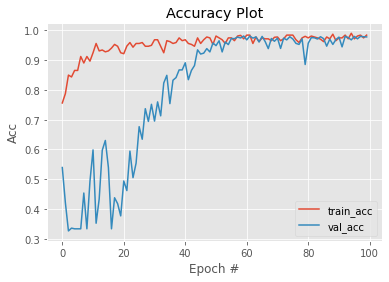

In [33]:
#ACC Model 1
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 100), H.history["acc"], label="train_acc")
plt.plot(np.arange(0, 100), H.history["val_acc"], label="val_acc")
plt.title("Accuracy Plot")
plt.xlabel("Epoch #")
plt.ylabel("Acc")
plt.legend()
plt.show()

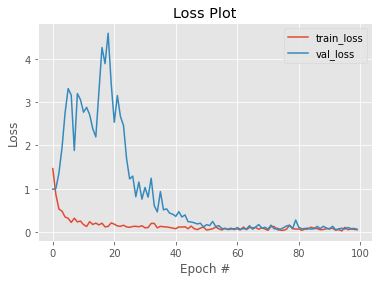

In [34]:
#Loss Model 1
%matplotlib inline

import matplotlib.pyplot as plt

plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 100), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 100), H.history["val_loss"], label="val_loss")
plt.title("Loss Plot")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()
plt.show()

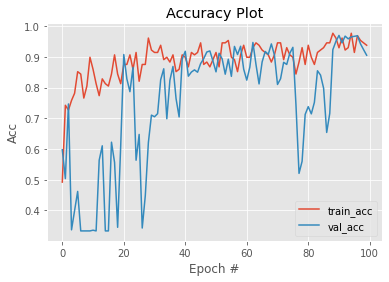

In [35]:
#ACC Model 2
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 100), H2.history["acc"], label="train_acc")
plt.plot(np.arange(0, 100), H2.history["val_acc"], label="val_acc")
plt.title("Accuracy Plot")
plt.xlabel("Epoch #")
plt.ylabel("Acc")
plt.legend()
plt.show()

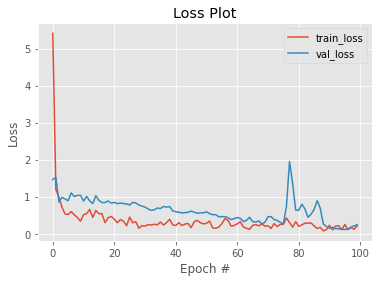

In [36]:
#Loss Model 2
%matplotlib inline

import matplotlib.pyplot as plt

plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 100), H2.history["loss"], label="train_loss")
plt.plot(np.arange(0, 100), H2.history["val_loss"], label="val_loss")
plt.title("Loss Plot")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()
plt.show()

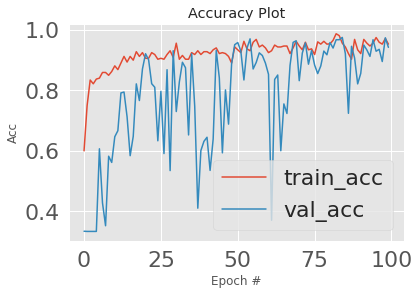

In [49]:
#ACC Model 2
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 100), H3.history["acc"], label="train_acc")
plt.plot(np.arange(0, 100), H3.history["val_acc"], label="val_acc")
plt.title("Accuracy Plot")
plt.xlabel("Epoch #")
plt.ylabel("Acc")
plt.legend()
plt.show()

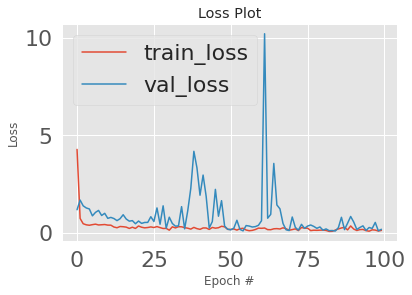

In [50]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 100), H3.history["loss"], label="train_loss")
plt.plot(np.arange(0, 100), H3.history["val_loss"], label="val_loss")
plt.title("Loss Plot")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()
plt.show()

## Result Accuracy

In [37]:
#Print Classification Report
#Print the Target names

target_names = []

for key in train_generator.class_indices:
    target_names.append(key)
print(target_names)

['mask_weared_incorrect', 'with_mask', 'without_mask']


In [38]:
#Result Accuracy Husein
from sklearn.metrics import classification_report
Y_pred = model.predict_generator(test_generator)
y_pred = np.argmax(Y_pred, axis=1)

print('Classification Report')
print(classification_report(test_generator.classes, y_pred, target_names=target_names))

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Classification Report
                       precision    recall  f1-score   support

mask_weared_incorrect       0.97      1.00      0.98        31
            with_mask       1.00      0.97      0.98        31
         without_mask       1.00      1.00      1.00        31

             accuracy                           0.99        93
            macro avg       0.99      0.99      0.99        93
         weighted avg       0.99      0.99      0.99        93



In [39]:
#Result Accuracy Adhi
from sklearn.metrics import classification_report
Y_pred2 = model2.predict_generator(test_generator)
y_pred2 = np.argmax(Y_pred2, axis=1)

print('Classification Report')
print(classification_report(test_generator.classes, y_pred2, target_names=target_names))

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Classification Report
                       precision    recall  f1-score   support

mask_weared_incorrect       0.81      0.97      0.88        31
            with_mask       1.00      0.74      0.85        31
         without_mask       0.94      1.00      0.97        31

             accuracy                           0.90        93
            macro avg       0.92      0.90      0.90        93
         weighted avg       0.92      0.90      0.90        93



In [51]:
from sklearn.metrics import classification_report
Y_pred3 = model3.predict_generator(test_generator)
y_pred3 = np.argmax(Y_pred3, axis=1)

print('Classification Report')
print(classification_report(test_generator.classes, y_pred3, target_names=target_names))

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Classification Report
                       precision    recall  f1-score   support

mask_weared_incorrect       0.84      1.00      0.91        31
            with_mask       1.00      0.81      0.89        31
         without_mask       1.00      1.00      1.00        31

             accuracy                           0.94        93
            macro avg       0.95      0.94      0.93        93
         weighted avg       0.95      0.94      0.93        93



## Result Confusion Metrix

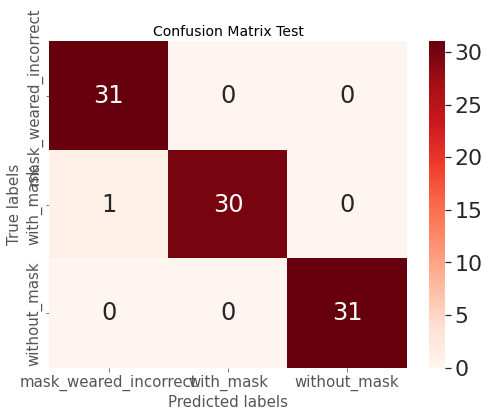

In [40]:
import seaborn as sns
from sklearn.metrics import  confusion_matrix

Cmatrix_test = confusion_matrix(test_generator.classes, y_pred)
class_names = test_generator.class_indices

plt.figure(figsize = (8,6))
ax = plt.subplot()
sns.set(font_scale=2.0) # Adjust to fit
sns.heatmap(Cmatrix_test,annot=True, fmt='',ax=ax, cmap=plt.cm.Reds)

# labels, title and ticks
label_font = {'size':'15'}  # Adjust to fit
ax.set_xlabel('Predicted labels', fontdict=label_font)
ax.set_ylabel('True labels', fontdict=label_font) 

title_font = {'size':'18'}  # Adjust to fit
ax.set_title('Confusion Matrix', fontdict=title_font)

ax.tick_params(axis='both', which='major', labelsize=15)  # Adjust to fit
ax.xaxis.set_ticklabels(class_names)   
ax.yaxis.set_ticklabels(class_names)
plt.title('Confusion Matrix Test',fontsize=14)
plt.show()